## Load Library

In [4]:
import sys 
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np 
import scipy as sp
import seaborn as sns
import IPython
from IPython import display 
import sklearn
import math
import random
import time
import warnings
print("Python version: {}". format(sys.version))
print("pandas version: {}". format(pd.__version__))
print("matplotlib version: {}". format(mpl.__version__))
print("NumPy version: {}". format(np.__version__))
print("SciPy version: {}". format(sp.__version__)) 
print("seaborn version: {}". format(sns.__version__)) 
print("IPython version: {}". format(IPython.__version__)) 
print("scikit-learn version: {}". format(sklearn.__version__))
warnings.filterwarnings('ignore')

Python version: 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.0.3
matplotlib version: 3.2.1
NumPy version: 1.16.4
SciPy version: 1.4.1
seaborn version: 0.9.0
IPython version: 7.2.0
scikit-learn version: 0.21.2


## Read csv and Look  dataframe

### read csv
header不要のとき,header=None

In [7]:
df = pd.read_csv("sample.csv")

### show head(default = 5)

In [8]:
df.head()

,id,col1,col2,col3,col4,col5,Tag
0,0,0,C,88.848,5.513,0vu2lz,1
1,1,0,C,61.275,15.062,ve47qk,0
2,2,0,A,27.914,-6.798,neyk0n,1
3,3,1,A,75.343,-6.825,hdeaha,1
4,4,0,B,77.565,22.567,lo1h3b,1


### show tail(default = 5)

In [4]:
df.tail()

,id,col1,col2,col3,col4,col5
5,5,0,C,97.980,4.113,gwwig6
6,6,0,A,2.679,13.044,qbt0ww
7,7,1,B,81.366,-2.442,i6jd7j
8,8,0,B,22.004,-8.325,mym5h8
9,9,1,A,67.775,-4.823,athntm


### show columns

In [50]:
df.columns

Index(['id', 'col1', 'col2', 'col3', 'col4', 'col5'], dtype='object')

### show data type

In [4]:
# show one column data type
df.col1.dtype

dtype('int64')

In [5]:
# show all columns data type
df.dtypes

id        int64
col1      int64
col2     object
col3    float64
col4    float64
col5     object
dtype: object

### show infomation

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      40 non-null     int64  
 1   col1    40 non-null     int64  
 2   col2    40 non-null     object 
 3   col3    40 non-null     float64
 4   col4    40 non-null     float64
 5   col5    40 non-null     object 
 6   Tag     40 non-null     int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 2.3+ KB


### show value_counts

In [ ]:
df["col2"].value_counts()

### count Nan in DataFrame

In [6]:
print(pd.isnull(df).sum())

id      0
col1    0
col2    0
col3    0
col4    0
col5    0
dtype: int64


### show describe

In [7]:
df.describe(include = "all")

,id,col1,col2,col3,col4,col5
count,10.00000,10.000000,10,10.000000,10.000000,10
unique,NaN,NaN,3,NaN,NaN,10
top,NaN,NaN,B,NaN,NaN,wgprqn
freq,NaN,NaN,5,NaN,NaN,1
mean,4.50000,0.300000,NaN,59.326600,-0.063900,NaN
std,3.02765,0.483046,NaN,34.940809,8.417498,NaN
min,0.00000,0.000000,NaN,2.679000,-15.419000,NaN
25%,2.25000,0.000000,NaN,33.446750,-4.227750,NaN
50%,4.50000,0.000000,NaN,75.363500,-0.798500,NaN
75%,6.75000,0.750000,NaN,80.920750,5.795250,NaN


### concat train and test

In [ ]:
dataset = pd.concat((df_train,df_test),ignore_index=True)

## Data Visualization
Using seaborn and matplotlib.

### distplot(Histgram)

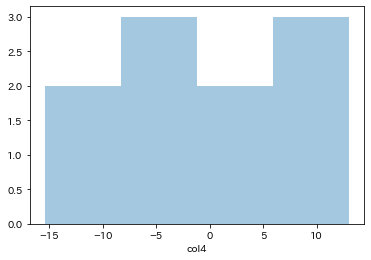

In [51]:
plt.figure(facecolor='white')
sns.distplot(a=df['col4'],kde=False)
plt.show()

### kdeplot
kde ... (Kernel Density Estimate)

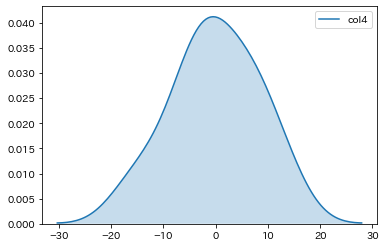

In [52]:
plt.figure(facecolor='white')
sns.kdeplot(data=df['col4'],shade=True)
plt.show()

### joint plot

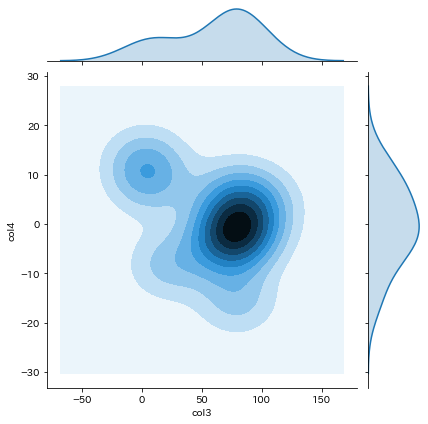

In [53]:
sns.jointplot(x=df['col3'],y=df['col4'],kind="kde")
plt.show()

### countplot

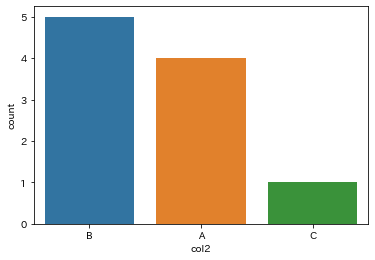

In [3]:
plt.figure(facecolor='white')
sns.countplot(df['col2'])
plt.show()

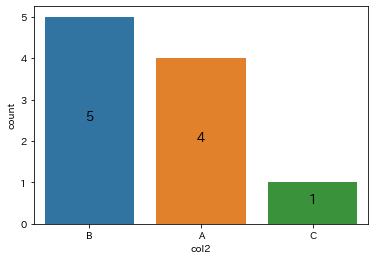

In [11]:
plt.figure(facecolor='white')
sns.countplot(df['col2'])
for col,num in enumerate(df['col2'].value_counts()):
    # うまくいかないとき .sort_values() or sort_index()
    plt.text(col, num/2, str(num),ha='center',fontsize=13)
plt.show()

### barchart

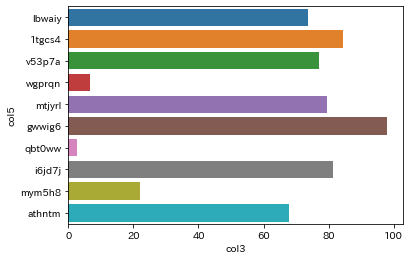

In [66]:
plt.figure(facecolor='white')
sns.barplot(x=df['col3'],y=df['col5'])
plt.show()

### boxplot

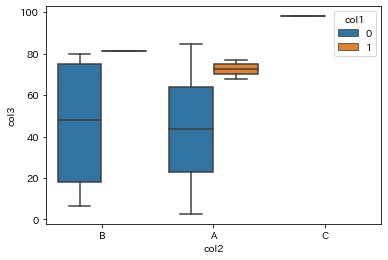

In [12]:
plt.figure(facecolor='white')
sns.boxplot(x='col2', y='col3',hue='col1',data=df)

### factorplot
kindの指定  
- point(dffault) : line graph
- bar : barchart
- count : countplot
- box : box plot
- violin : violin plot

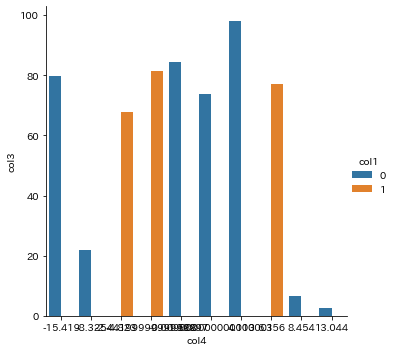

In [21]:
sns.factorplot(x="col4",y="col3",hue="col1",data=df,kind="bar")

### heat map

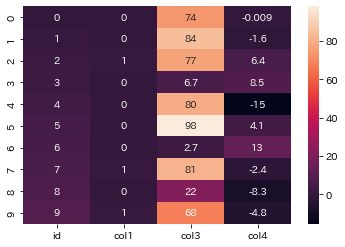

In [69]:
## general heat map
plt.figure(facecolor='white')
sns.heatmap(data=df.loc[:,['id','col1','col3','col4']],annot=True)

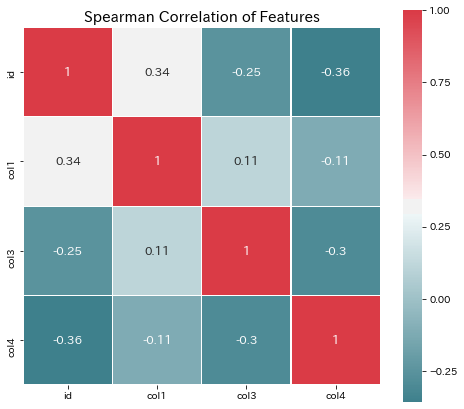

In [74]:
## Correlation map
fig , ax = plt.subplots(figsize =(8, 8),facecolor='white')
colormap = sns.diverging_palette(210,10, as_cmap = True)
corr = df.loc[:,['id','col1','col3','col4']].corr(method='spearman') # pearson or spearman
fig = sns.heatmap(
        corr, 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, #めちゃくちゃになったらFalse
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
plt.title('Spearman Correlation of Features', y=1.05, size=15) # pearson or spearman
plt.show()

### scatter

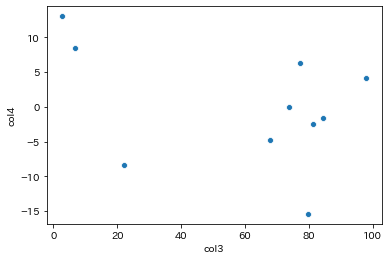

In [75]:
plt.figure(facecolor='white')
sns.scatterplot(x=df['col3'],y=df['col4'])

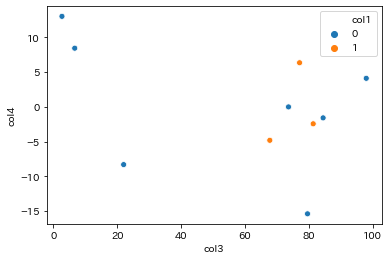

In [79]:
plt.figure(facecolor='white')
sns.scatterplot(x=df['col3'],y=df['col4'],hue=df['col1'])

### regplot

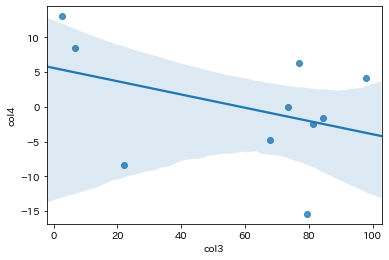

In [76]:
plt.figure(facecolor='white')
sns.regplot(x=df['col3'],y=df['col4'])

### lmplot

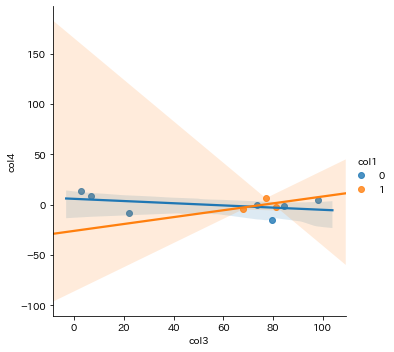

In [82]:
sns.lmplot(x='col3',y='col4',hue='col1',data=df)

### lineplot

In [ ]:
plt.figure(facecolor='white')
sns.lineplot(x=df.index,y=df['col4'])
plt.show()

### swarmplot(蜂群図)

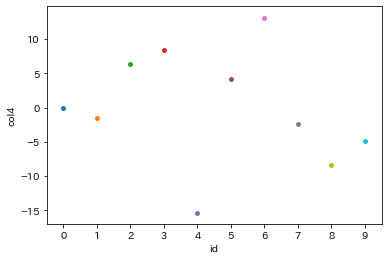

In [84]:
plt.figure(facecolor='white')
sns.swarmplot(x=df['id'],y=df['col4'])

### normal probability plot(正規QQプロット)

In [13]:
from scipy import stats

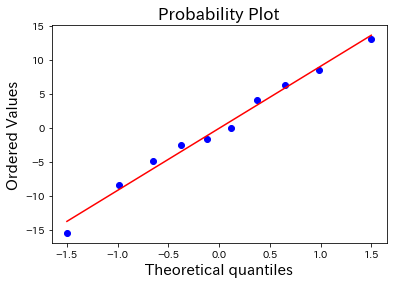

In [15]:
plt.figure(facecolor='white')
stats.probplot(df['col4'],dist=stats.norm,plot=plt)
plt.xlabel("Theoretical quantiles",fontsize = 15)
plt.ylabel("Ordered Values",fontsize = 15)
plt.title("Probability Plot",fontsize = 17)
plt.show()

## Feature engineering and Filling missing value

### filling missing value

In [ ]:
df['col'] = df['col'].fillna(df['col'].median())

### make new feature in dataframe

In [6]:
df['col6'] = df['col3']-df['col4']
df

,id,col1,col2,col3,col4,col5,col6
0,0,0,B,73.632,-0.009,lbwaiy,73.641
1,1,0,A,84.470,-1.588,1tgcs4,86.058
2,2,1,A,77.095,6.356,v53p7a,70.739
3,3,0,B,6.680,8.454,wgprqn,-1.774
4,4,0,B,79.585,-15.419,mtjyrl,95.004
5,5,0,C,97.980,4.113,gwwig6,93.867
6,6,0,A,2.679,13.044,qbt0ww,-10.365
7,7,1,B,81.366,-2.442,i6jd7j,83.808
8,8,0,B,22.004,-8.325,mym5h8,30.329
9,9,1,A,67.775,-4.823,athntm,72.598


### drop feature

In [9]:
drop_features = ['col4','col6']
df.drop(labels = drop_features, axis = 1, inplace = True)
df

,id,col1,col2,col3,col5
0,0,0,B,73.632,lbwaiy
1,1,0,A,84.470,1tgcs4
2,2,1,A,77.095,v53p7a
3,3,0,B,6.680,wgprqn
4,4,0,B,79.585,mtjyrl
5,5,0,C,97.980,gwwig6
6,6,0,A,2.679,qbt0ww
7,7,1,B,81.366,i6jd7j
8,8,0,B,22.004,mym5h8
9,9,1,A,67.775,athntm


### binarization

In [ ]:
# code can move on Titanic dataset
df['Sex'].replace(['male','female'], [0, 1], inplace=True)

### label encoding

In [10]:
df['col2'] = df['col2'].map( {'A': 0, 'B': 1, 'C': 2} ).astype(int)
df

,id,col1,col2,col3,col5
0,0,0,1,73.632,lbwaiy
1,1,0,0,84.470,1tgcs4
2,2,1,0,77.095,v53p7a
3,3,0,1,6.680,wgprqn
4,4,0,1,79.585,mtjyrl
5,5,0,2,97.980,gwwig6
6,6,0,0,2.679,qbt0ww
7,7,1,1,81.366,i6jd7j
8,8,0,1,22.004,mym5h8
9,9,1,0,67.775,athntm


### one-hot encoding

In [11]:
df = pd.get_dummies(df,columns=['col2'])
df

,id,col1,col3,col5,col2_0,col2_1,col2_2
0,0,0,73.632,lbwaiy,0,1,0
1,1,0,84.470,1tgcs4,1,0,0
2,2,1,77.095,v53p7a,1,0,0
3,3,0,6.680,wgprqn,0,1,0
4,4,0,79.585,mtjyrl,0,1,0
5,5,0,97.980,gwwig6,0,0,1
6,6,0,2.679,qbt0ww,1,0,0
7,7,1,81.366,i6jd7j,0,1,0
8,8,0,22.004,mym5h8,0,1,0
9,9,1,67.775,athntm,1,0,0


### dummy encoding

In [13]:
pd.get_dummies(df,columns=['col2'],drop_first=True)

,id,col1,col3,col4,col5,col2_B,col2_C
0,0,0,73.632,-0.009,lbwaiy,1,0
1,1,0,84.470,-1.588,1tgcs4,0,0
2,2,1,77.095,6.356,v53p7a,0,0
3,3,0,6.680,8.454,wgprqn,1,0
4,4,0,79.585,-15.419,mtjyrl,1,0
5,5,0,97.980,4.113,gwwig6,0,1
6,6,0,2.679,13.044,qbt0ww,0,0
7,7,1,81.366,-2.442,i6jd7j,1,0
8,8,0,22.004,-8.325,mym5h8,1,0
9,9,1,67.775,-4.823,athntm,0,0


## Modeling and Validation

In [9]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

test_Tag =  df_test['Tag']
train_Tag = df_train['Tag']
dataset = pd.concat((df_train,df_test),ignore_index=True)
drop_features = ['id','col5','Tag']
dataset.drop(labels = drop_features, axis = 1, inplace = True)
dataset['col2'] = dataset['col2'].map( {'A': 0, 'B': 1, 'C': 2} ).astype(int)
dataset = pd.get_dummies(dataset,columns=['col2'])
train = dataset[:len(df_train)]
test = dataset[len(df_train):]

In [10]:
train.head()

,col1,col3,col4,col2_0,col2_1,col2_2
0,1,16.080,8.969,0,1,0
1,0,3.001,0.241,0,1,0
2,0,59.243,-7.066,1,0,0
3,1,84.186,-1.523,1,0,0
4,0,6.959,5.693,1,0,0


### Hold-out validation

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(train,train_Tag,random_state=1)

In [29]:
import xgboost
from sklearn.metrics import accuracy_score

model = xgboost.XGBClassifier()
model.fit(X_train,y_train)

train_prediction = model.predict(X_train)
valid_prediction = model.predict(X_valid)
print('train accuracy :'+str(accuracy_score(train_prediction,y_train)))
print('valid accuracy :'+str(accuracy_score(valid_prediction,y_valid)))

train accuracy :0.8711111111111111
valid accuracy :0.4533333333333333


### Cross validation

In [11]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [12]:
kfold = KFold(n_splits=10)

In [44]:
# define model
random_state=1
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))

In [45]:
# cross validation
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

In [46]:
# calculate mean and std of score
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","MultipleLayerPerceptron"]})

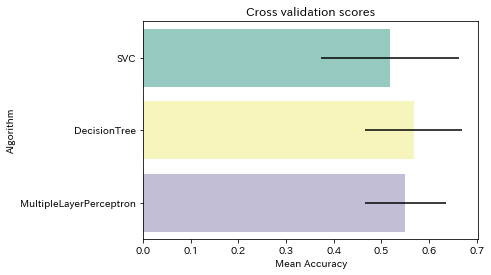

In [47]:
plt.figure(facecolor='white')
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

### Hyper parameter tuning

In [29]:
import xgboost
from sklearn.model_selection import GridSearchCV

model = xgboost.XGBClassifier()
param_grid = {'max_depth':[7,10,15,20],'min_child_weight':[7,10,15,20],'early_stopping_rounds':[30]}

clf = GridSearchCV(model,param_grid = param_grid, cv=kfold,scoring="accuracy", n_jobs= -1, verbose = 1)
clf.fit(X_train,y_train)
print("best_estimator_\n")
print(clf.best_estimator_)
print("best_params_\n")
print(clf.best_params_)
print("best_score_\n")
print(clf.best_score_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s


best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=30,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=15, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
best_params_

{'early_stopping_rounds': 30, 'max_depth': 7, 'min_child_weight': 15}
best_score_

0.5911111111111111


[Parallel(n_jobs=-1)]: Done 153 out of 160 | elapsed:    8.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    8.6s finished
